##  Business Case:Utilize an appropriate machine learning model designed to detect fraudulent credit card transactions.

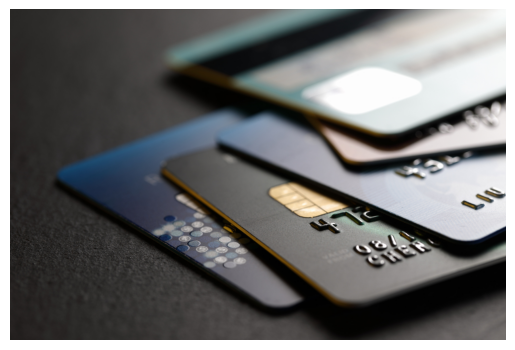

In [3]:
img=plt.imread('Card.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Import Basic libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset

In [2]:
data= pd.read_csv("creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Basic checks

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.Class.unique()

array([0, 1], dtype=int64)

In [9]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data preprocessing

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.duplicated().sum()

1081

In [6]:
data.duplicated().any()

True

In [7]:
# so the data contains duplicates so we want to remove those duplicates.

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
fraud_count = data['Class'].value_counts()[1]
nonfraud_count = data['Class'].value_counts()[0]

print(f"Number of Fraud Records: {fraud_count}")
print(f"Number of Non-Fraud Records: {nonfraud_count}")

Number of Fraud Records: 473
Number of Non-Fraud Records: 283253


# EXPLORATORY DATA ANALYSIS

##### EDA is a process of seeing data before making the changes or predictions.

## UNIVARIATE ANALYSIS

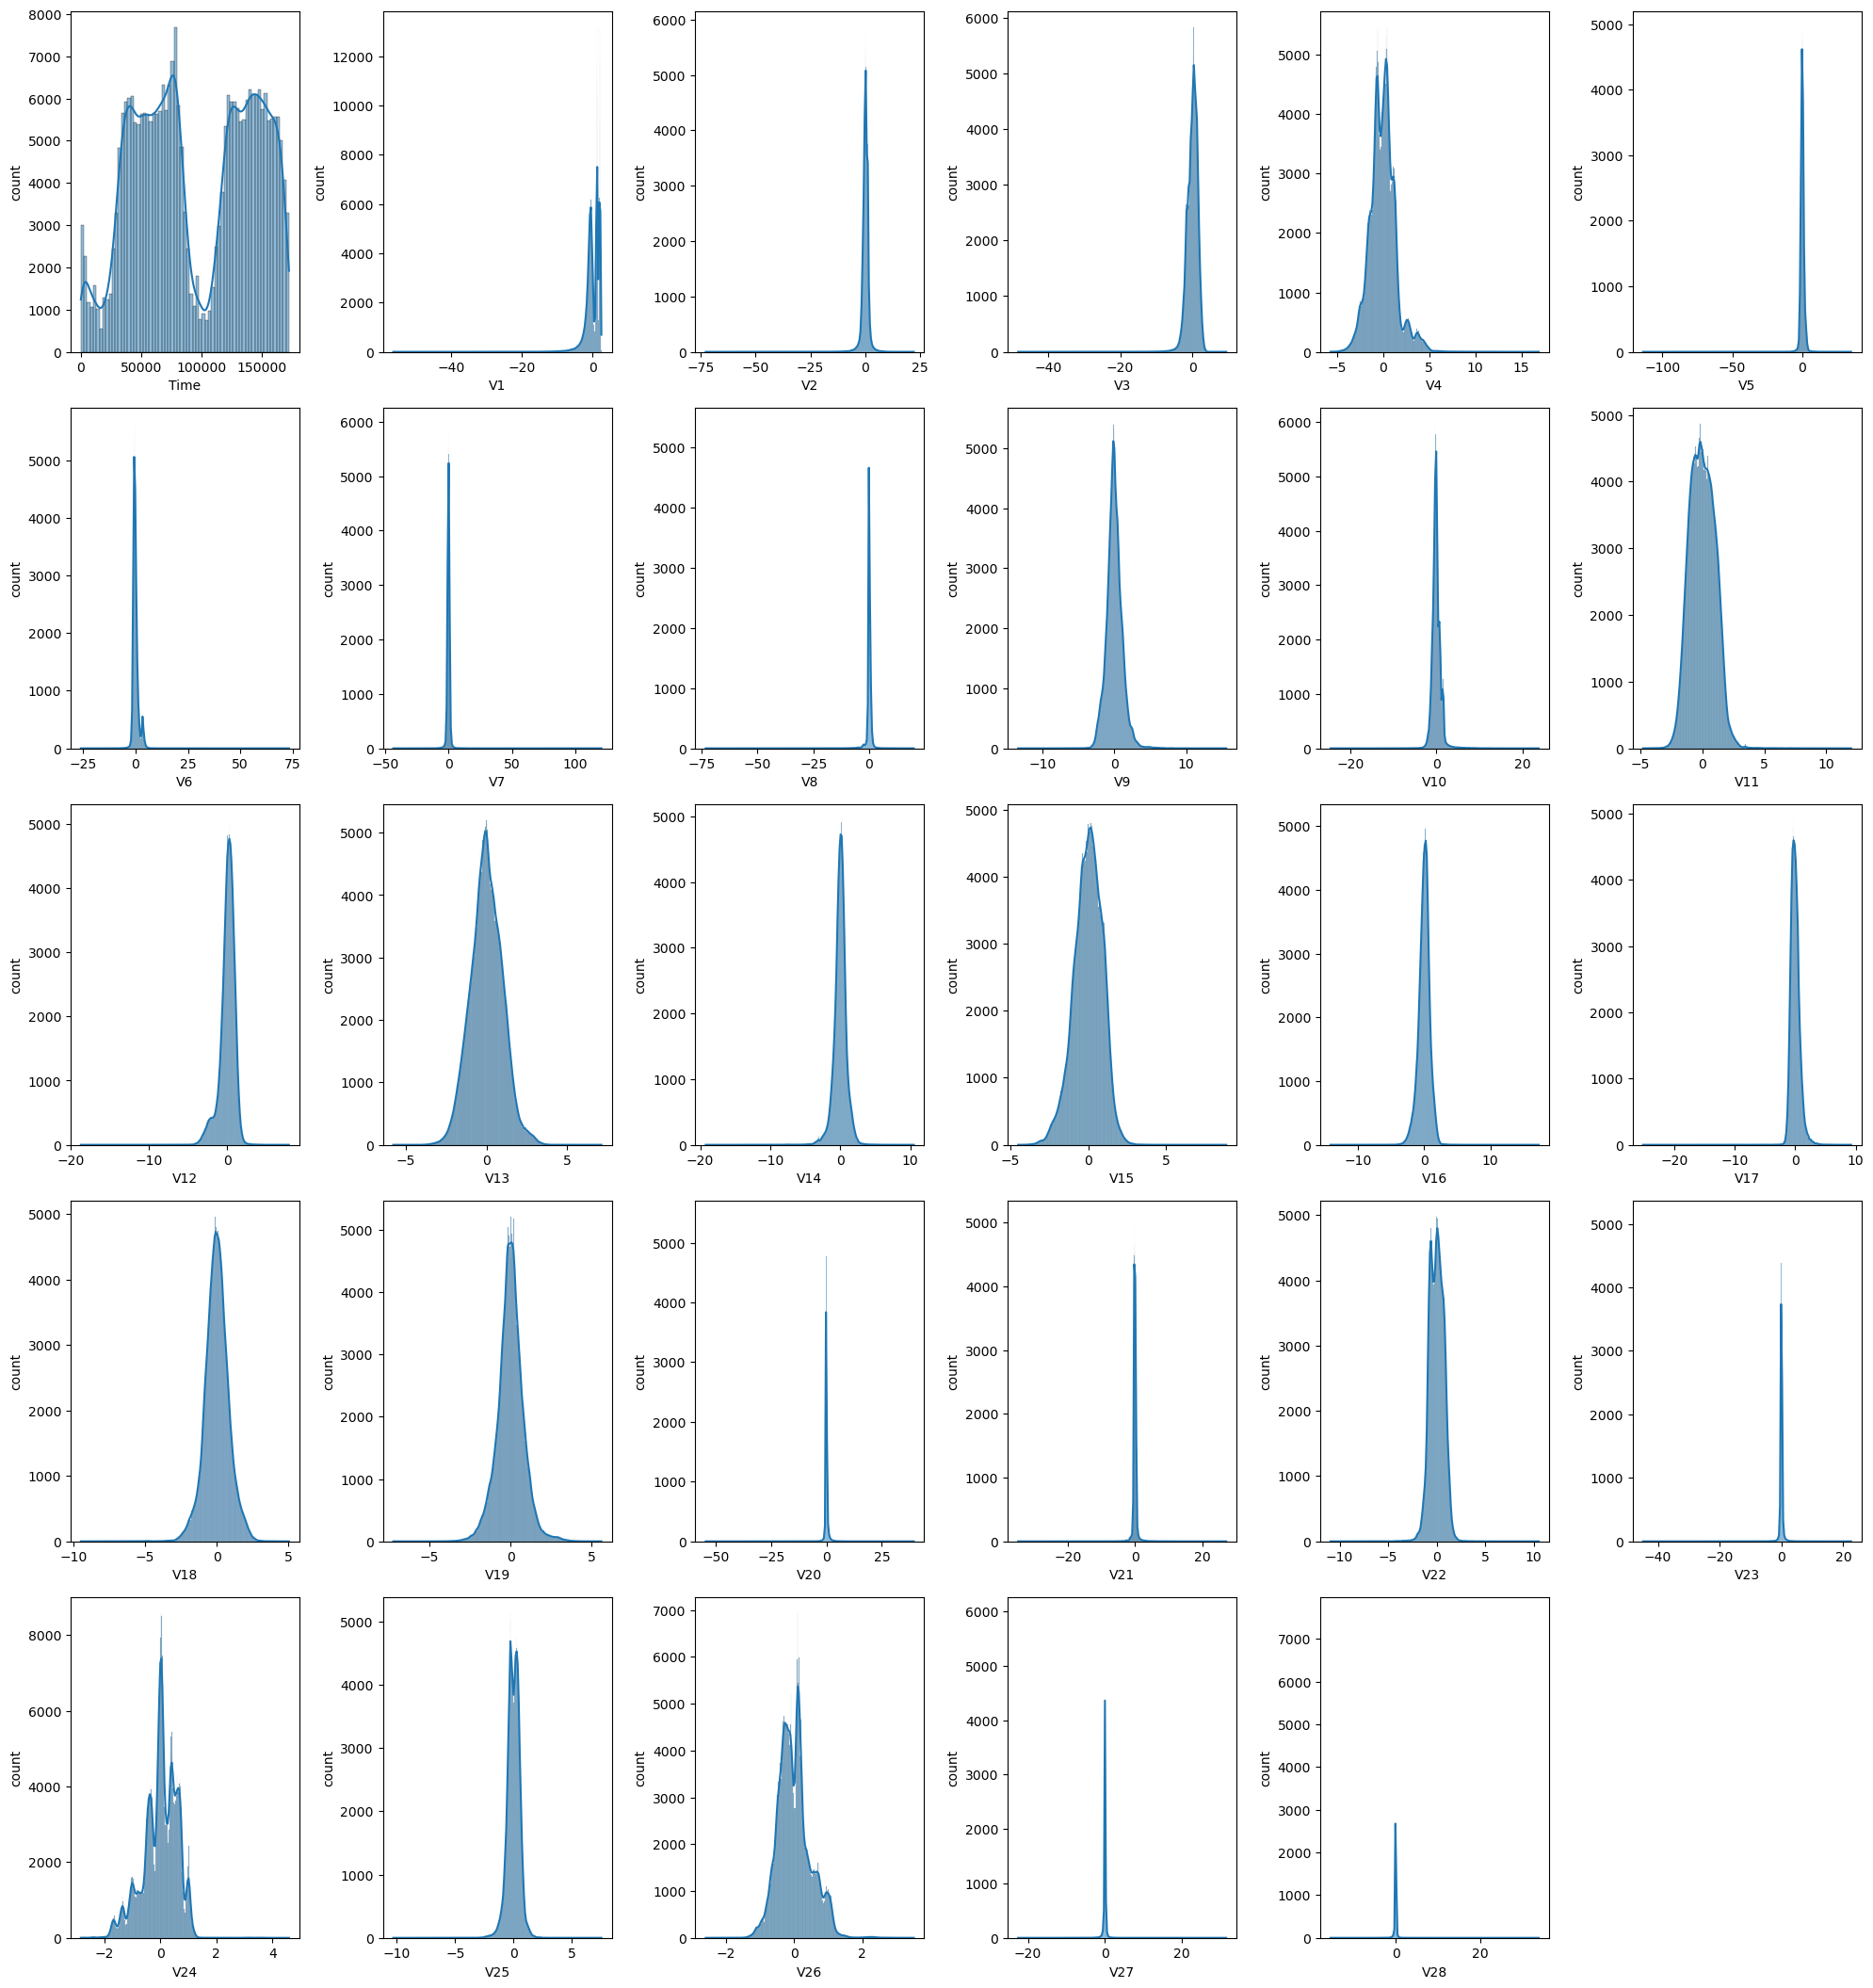

In [19]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data.drop('Class',axis=True):
    if plotnumber<=29:
        ax=plt.subplot(6,6,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Bivariate Anslysis

<Axes: xlabel='Class', ylabel='count'>

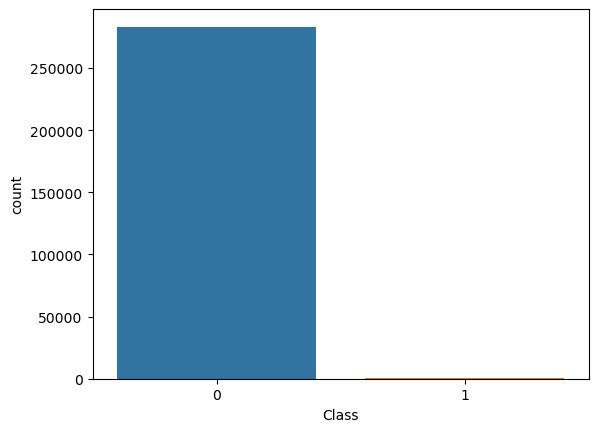

In [18]:
sns.countplot(x=data.Class)

In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Feature Engineering

In [12]:
# Check for multicollinearity
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<Axes: >

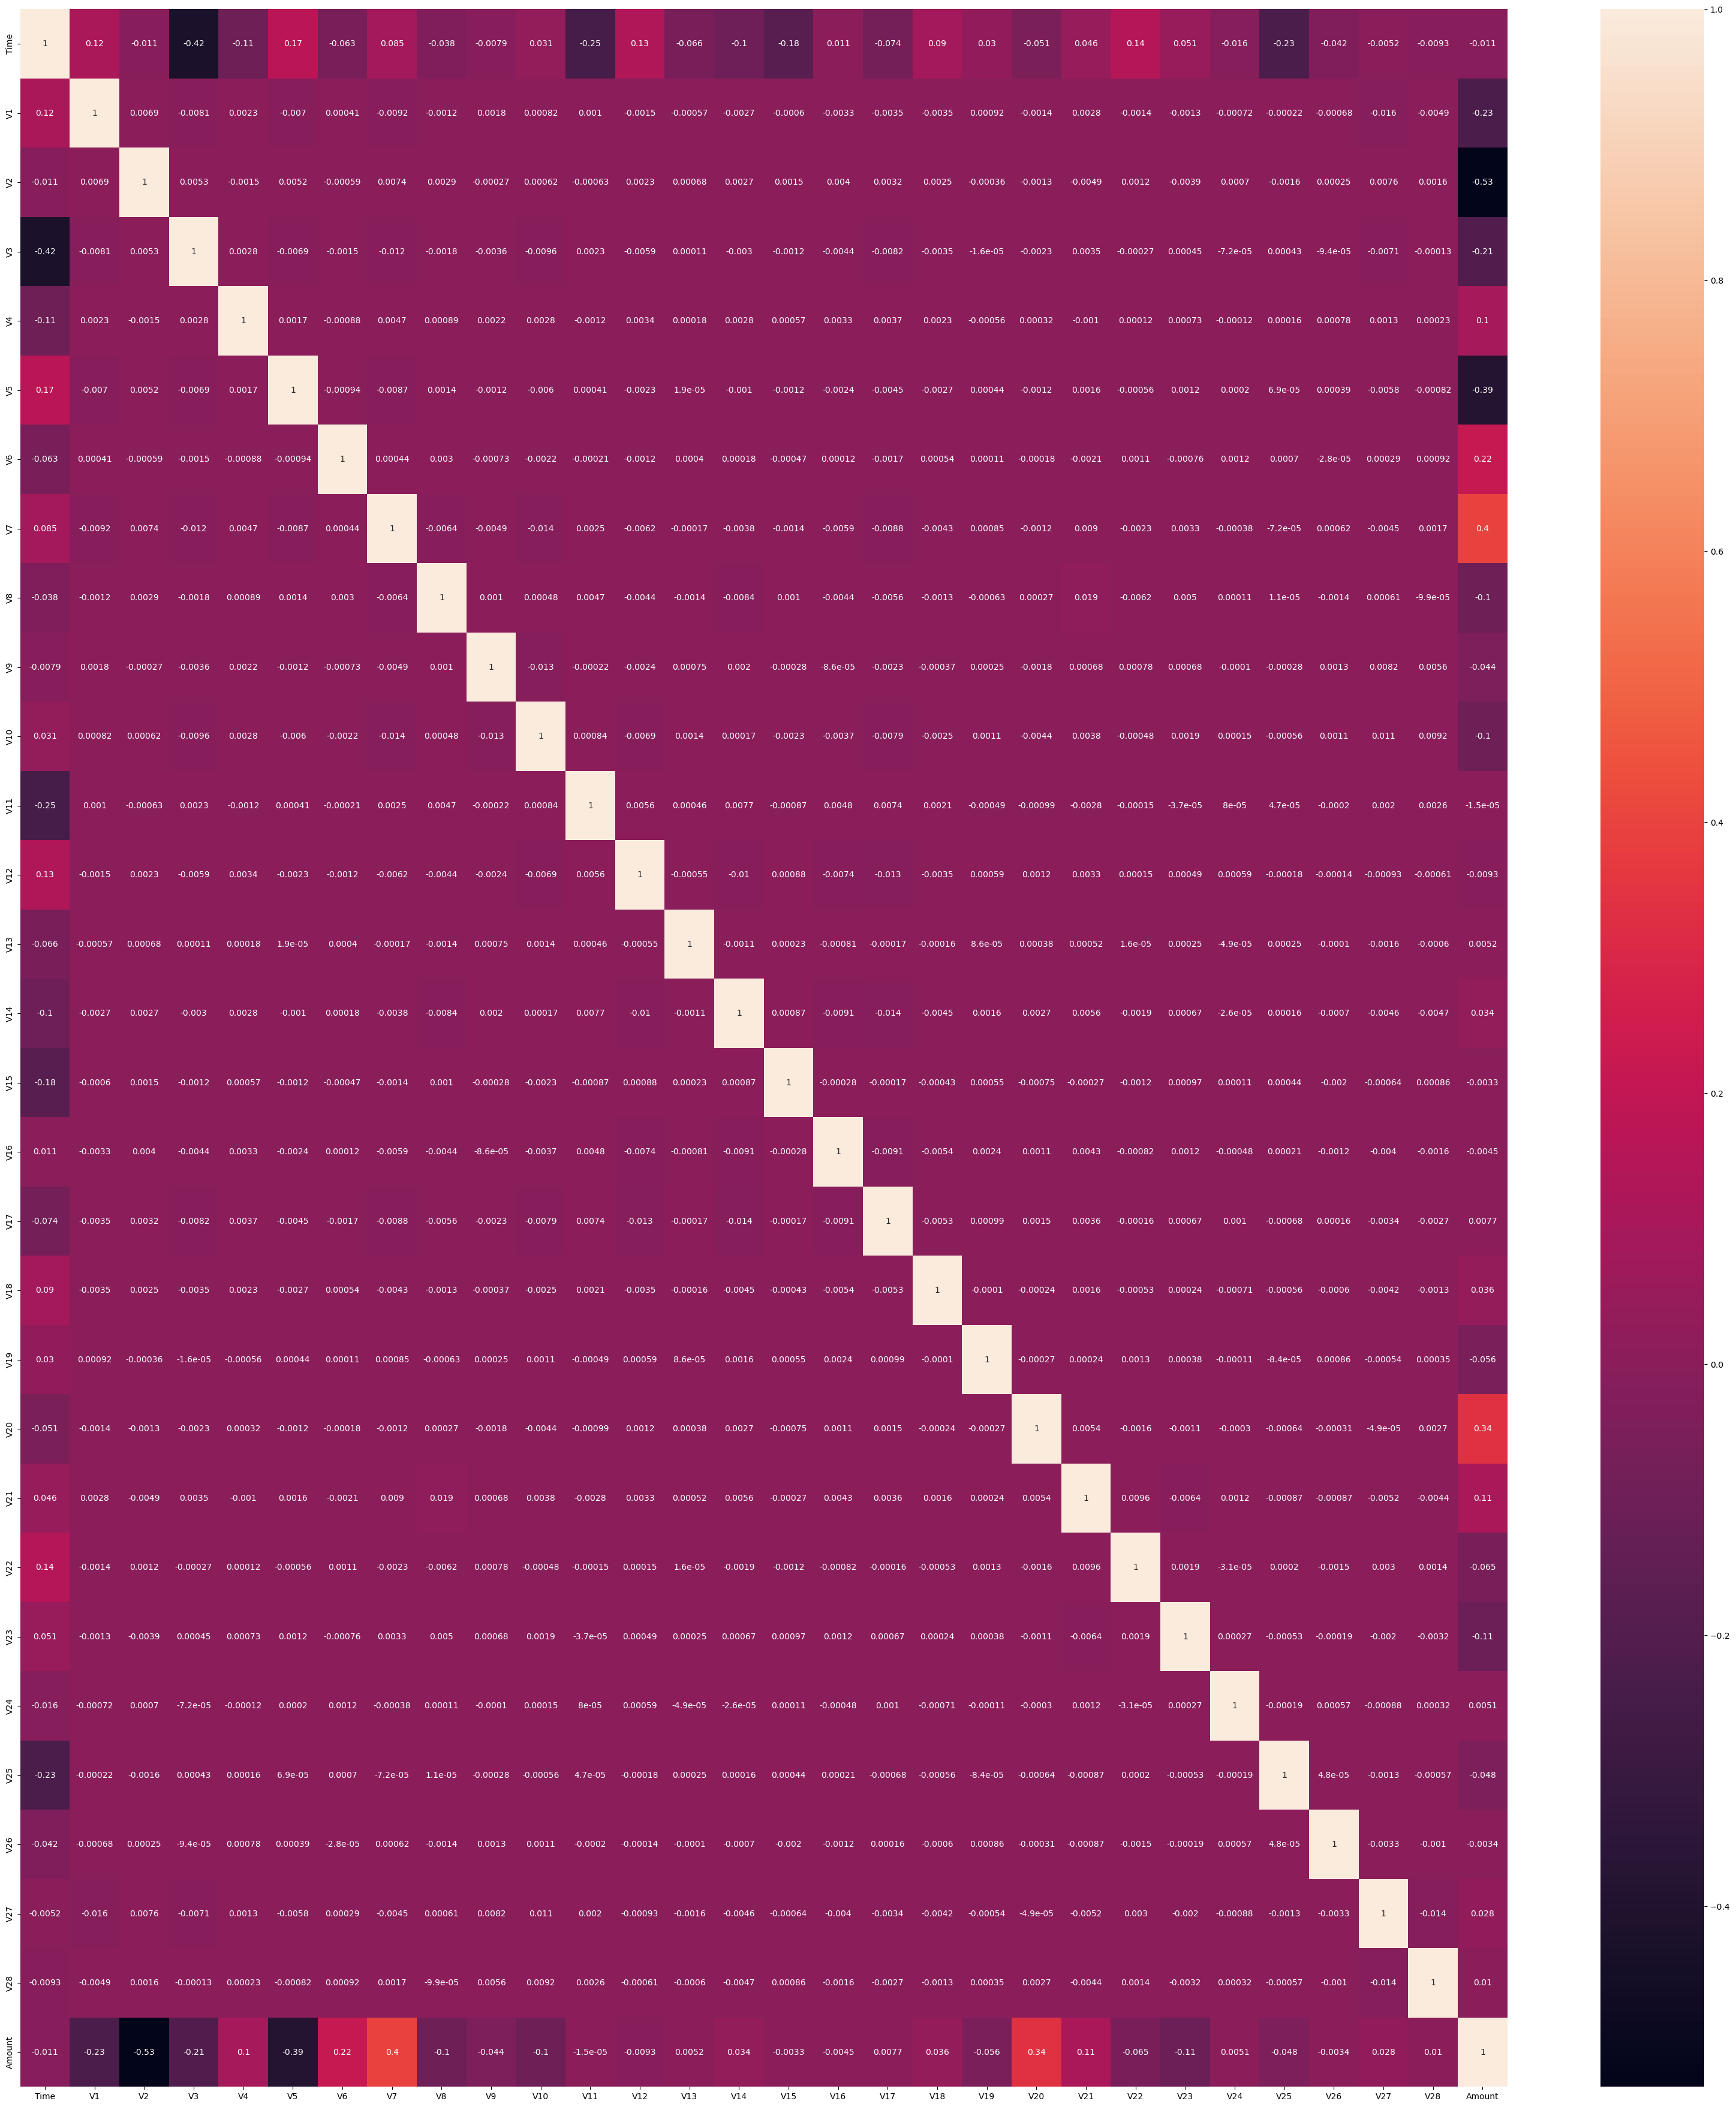

In [14]:
# draw graph
plt.figure(figsize=(40,45))
sns.heatmap(data.drop("Class",axis=1).corr(),annot=True)

# Model Building

# Split the data into train and test

In [11]:
# Split data into x & y 
x=data.drop('Class',axis=1)
y=data[["Class"]]

In [12]:
# split data for training & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [13]:
print(x_train.shape)
print(x_test.shape)

(198608, 30)
(85118, 30)


# Balancing data

In [13]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

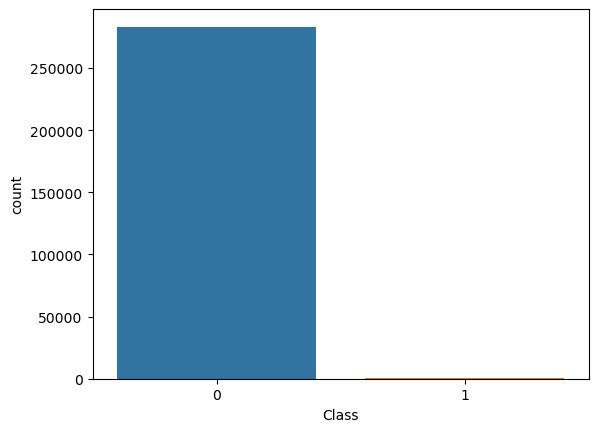

In [14]:
sns.countplot(x=data.Class)

# Smote

* Smote is used to balance the data by creating artificial data of minority class.
* Smote is applied after train_test_split process.
* Smote is applied only on train data

In [15]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [15]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [16]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({'Class': 1})
SMOTE Classes Counter({'Class': 1})


In [17]:
data.Class.unique()

array([0, 1], dtype=int64)

In [18]:
y_smote.value_counts()

Class
0        198266
1        198266
dtype: int64

# Logistic regression

In [30]:
# import the Logistic regression model 
from sklearn.linear_model import LogisticRegression 
## initiallisation of the model
model=LogisticRegression()

model.fit(x_smote,y_smote)

LogisticRegression()

In [31]:
##make predictions by testing data 
# evaluate by using the x_test 
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluate the model

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [33]:
confusion_matrix(y_test,y_pred)

array([[83282,  1705],
       [   15,   116]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.9797927582884937

In [35]:
precision_score(y_test,y_pred)

0.06370126304228446

In [36]:
recall_score(y_test,y_pred)

0.8854961832061069

In [37]:
f1_score(y_test,y_pred)

0.11885245901639345

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84987
           1       0.06      0.89      0.12       131

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118



# KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_smote,y_smote)

KNeighborsClassifier()

In [37]:
y_pred=KNN.predict(x_test)

# Evaluate the model

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report ,f1_score

In [39]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[80346,  4641],
       [   74,    57]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred)

0.9446063112385159

In [41]:
precision_score(y_test,y_pred)

0.012132822477650063

In [42]:

recall_score(y_test,y_pred)

0.4351145038167939

In [43]:
f1_score(y_test,y_pred)

0.023607372126734312

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     84987
           1       0.01      0.44      0.02       131

    accuracy                           0.94     85118
   macro avg       0.51      0.69      0.50     85118
weighted avg       1.00      0.94      0.97     85118



# Decision tree classifier

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=3)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [23]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model evaluation

In [24]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

0.999421976183539

In [25]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.9993232955506682

# Gradient Boosting

In [26]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70826
           1       0.80      0.58      0.67       106

    accuracy                           1.00     70932
   macro avg       0.90      0.79      0.83     70932
weighted avg       1.00      1.00      1.00     70932



# XG Boost

In [30]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70826
           1       0.92      0.94      0.93       106

    accuracy                           1.00     70932
   macro avg       0.96      0.97      0.97     70932
weighted avg       1.00      1.00      1.00     70932



# Final Report

In [5]:
scores=[ 0.98,0.94,0.99,1.00,1.00]
algorithms=['LogisticRegression','KNN','DecisionTree','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The accuracy Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The accuracy Score acheived using LogisticRegression is: 0.98%
The accuracy Score acheived using KNN is: 0.94%
The accuracy Score acheived using DecisionTree is: 0.99%
The accuracy Score acheived using GradientBoosting is: 1.0%
The accuracy Score acheived using XGBoosting is: 1.0%


# Summary

#### After evaluating every model, it has been determined that Gradient Boosting achieves an accuracy of 91.5%, indicating its suitability as a strong model.

# Techniques Used

**Model Selection:**
    
    Choosing the right machine learning algorithm or combination of algorithms can be a significant challenge. In the 
    context of classification tasks, such as predicting whether a client will subscribe to a term deposit or not, commonly 
    explored options include XGBoost, Random Forest, and Linear Regression models.
    
**Smote:**

    SMOTE helps in improving the performance of machine learning models when trained on imbalanced datasets because it increases the representation of the minority class. This can lead to better model generalization and predictive accuracy for the minority class.
    
**Ensemble Techniques:**

    Leveraging ensemble methods, such as stacking or blending multiple models like XGBoost, Random Forest, and Gradient Boosting, can significantly enhance predictive accuracy.
    
**Feature Engineering for Categorical Data:**

    Label encoding and target encoding methods are utilized to convert categorical variables into an appropriate format for modeling purposes.  